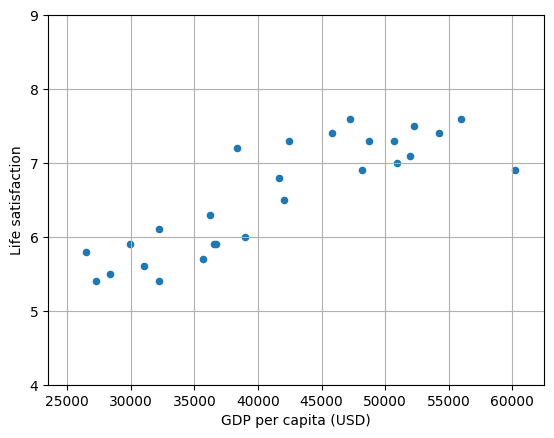

[[6.30165767]]


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Download and prepare the data
lifesat = pd.read_csv("lifesat.csv")
X = lifesat[["GDP per capita (USD)"]].values
y = lifesat[["Life satisfaction"]].values

# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

# Select a linear model
model = LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Cyprus
X_new = [[37_655.2]]  # Cyprus' GDP per capita in 2020
print(model.predict(X_new)) # outputs [[6.30165767]]


In [2]:
X_test = np.linspace(25000, 60000, 200)
X_test = [[value] for value in X_test]
y_test = model.predict(X_test)

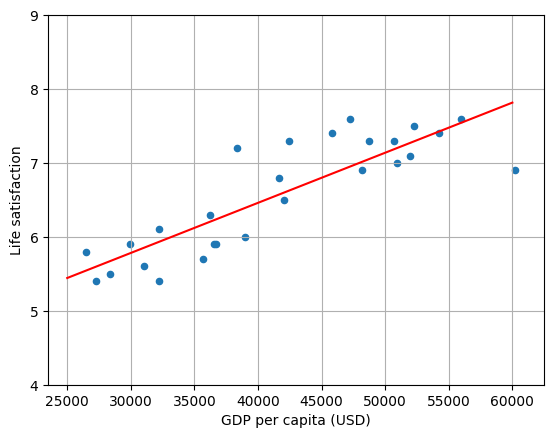

In [3]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X_test, y_test, color='red')
plt.show()

In [4]:
class KNearestNeighborRegressor(object):
  """ a kNN regressor with L2 distance """

  def __init__(self):
    pass

  def train(self, X, y):
    """
    Train the classifier. For k-nearest neighbors this is just 
    memorizing the training data.

    Inputs:
    - X: A numpy array of shape (num_train, D) containing the training data
      consisting of num_train samples each of dimension D.
    - y: A numpy array of shape (N,) containing the training labels, where
         y[i] is the label for X[i].
    """
    self.X_train = X
    self.y_train = y
    
  def predict(self, X, k=1):
    """
    Predict labels for test data using this classifier.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data consisting
         of num_test samples each of dimension D.
    - k: The number of nearest neighbors that vote for the predicted labels.
    - num_loops: Determines which implementation to use to compute distances
      between training points and testing points.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted labels for the
      test data, where y[i] is the predicted label for the test point X[i].  
    """
    dists = self.compute_distances(X)
    
    return self.predict_values(dists, k=k)


  def compute_distances(self, X):
    """
    Compute the distance between each test point in X and each training point
    in self.X_train using a single loop over the test data.

    Inputs:
    - X: A numpy array of shape (num_test, D) containing test data.

    Returns:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      is the Euclidean distance between the ith test point and the jth training
      point.
    """
    num_test = X.shape[0]
    num_train = self.X_train.shape[0]
    dists = np.zeros((num_test, num_train))
    for i in range(num_test):
        #######################################################################
        # TODO:                                                               #
        # Compute the l2 distance between the ith test point and all training #
        # points, and store the result in dists[i, :].                        #
        #######################################################################
        dists[i] = np.sqrt(np.sum((X[i] - self.X_train) ** 2, axis=1))
        pass
    
        #######################################################################
        #                         END OF YOUR CODE                            #
        #######################################################################
    return dists


  def predict_values(self, dists, k=1):
    """
    Given a matrix of distances between test points and training points,
    predict a value for each test point.

    Inputs:
    - dists: A numpy array of shape (num_test, num_train) where dists[i, j]
      gives the distance betwen the ith test point and the jth training point.

    Returns:
    - y: A numpy array of shape (num_test,) containing predicted values for the
      test data, where y[i] is the predicted value for the test point X[i].  
    """
    num_test = dists.shape[0]
    y_pred = np.zeros(num_test)
    for i in range(num_test):
        # A list of length k storing the labels of the k nearest neighbors to
        # the ith test point.
        closest_y = []
        
        #########################################################################
        # TODO:                                                                 #
        # Use the distance matrix to find the k nearest neighbors of the ith    #
        # testing point, and use self.y_train to find the labels of these       #
        # neighbors. Store these labels in closest_y.                           #
        # Hint: Look up the function numpy.argsort.                             #
        #########################################################################
        k_indice_voisins = np.argsort(dists[i])[0:k]
        closest_y = self.y_train[k_indice_voisins]
        pass
    
        #########################################################################
        # TODO:                                                                 #
        # Now that you have found the labels of the k nearest neighbors, you    #
        # need to compute the average of the target values corresponding to the #
        # nearest neighbors.                                                    #
        #########################################################################
        y_pred[i] = np.mean(closest_y)
        pass
        
        #########################################################################
        #                           END OF YOUR CODE                            # 
        #########################################################################

    return y_pred

In [6]:
knn_reg = KNearestNeighborRegressor()
knn_reg.train(np.array(X), y)

In [7]:
y_hat_1 = knn_reg.predict(np.array(X_test), k=1)
y_hat_3 = knn_reg.predict(np.array(X_test), k=3)
y_hat_5 = knn_reg.predict(np.array(X_test), k=5)
y_hat_7 = knn_reg.predict(np.array(X_test), k=7)
y_hat_20 = knn_reg.predict(np.array(X_test), k=20)
y_hat_27 = knn_reg.predict(np.array(X_test), k=27)

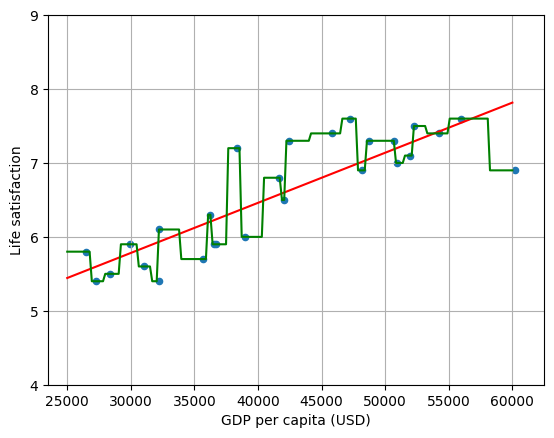

In [8]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X_test, y_test, color='red')
plt.plot(X_test, y_hat_1, color='green')
# plt.plot(X_test, y_hat_3, color='blue')
# plt.plot(X_test, y_hat_5, color='magenta')
# plt.plot(X_test, y_hat_7, color='orange')
# plt.plot(X_test, y_hat_20, color='black')
# plt.plot(X_test, y_hat_27, color='grey')
plt.show()

**1) What is the predicted life satisfaction for Cyprus assuming that the GDP per capita is 38,341 USD ?**

In [13]:
for k in range(1,10):
    print(knn_reg.predict(np.full(200, 38341), k=k)[0])

7.2
6.6
6.366666666666667
6.25
6.26
6.166666666666667
6.257142857142857
6.2875
6.3999999999999995


38341 ne se trouve pas dans les extrémités, donc un k élevé donnera une meilleure précision. La valeure prédite se trouve à environ **6.4**

**2) What is the predicted life satisfaction for Switzerland assuming that the GDP per capita is 69,669 USD ?**

In [14]:
for k in range(1,10):
    print(knn_reg.predict(np.full(200, 69669), k=k)[0])

6.9
7.25
7.3
7.35
7.3
7.25
7.257142857142857
7.262499999999999
7.222222222222222


69669 se trouve hors de nos valeurs d'entrainement utilisées pour élaborer le modèle. La valeure prédite n'est pas forcément corrélé à la réalité, on voit au final un plateau qui se forme aux extrémités dû au manque de données dans cette région. En l'état, notre modèle ne peut pas prédire une life satisfaction pour la valeure 69669.

**3) What becomes the prediction when K is approaching N (the number of points in the training set). Do the experiment with K = 20 and K = 27, report your observation.**

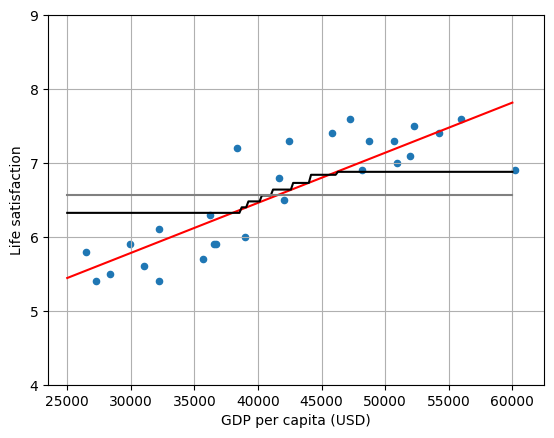

In [16]:
# Visualize the data
lifesat.plot(kind='scatter', grid=True,
             x="GDP per capita (USD)", y="Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.plot(X_test, y_test, color='red')
plt.plot(X_test, y_hat_20, color='black')
plt.plot(X_test, y_hat_27, color='grey')
plt.show()

Quand on prend un k très elevé, on perd la localité. Pour k=N, on fait au final la moyenne de tous les points du dataset, et toutes les prédictions deviennent identiques, égales à la moyenne (underfitting). Pour K=20, les prédictions sont bonnes au milieu, mais perdent la localité assez vite.